<a href="https://colab.research.google.com/github/JefNtungila/DS-Unit-2-Regression-1/blob/master/Jef_Ntungila_assigment_29_05_2019_doing_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#I added unemployment rate throughout this notebook

## Assignment

#### Predict presidential election voting, with two features you choose!
- Start a new notebook.
- You may reuse one of the features from the "Bread & Peace" model.
- **Acquire data for at least one new feature.** The links below may help!
- Commit your notebook to your fork of the GitHub repo.

#### Why I'm asking you to acquire data for at least one new [feature](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### You can search [FRED (Federal Reserve Bank of St. Louis)](https://fred.stlouisfed.org/) for these keywords
- real disposable income change annual
- gdp change annual
- unemployment 

#### Go to [BEA (Bureau of Economic Analysis)](https://apps.bea.gov/itable/) and follow these steps
- National Data - GDP & Personal Income
- Begin using the data
- Section 1 - DOMESTIC PRODUCT AND INCOME
- Table 1.17.1. Percent Change From Preceding Period in Real Gross Domestic Product, Real Gross Domestic Income, and Other Major NIPA Aggregates
- Modify
  - First Year: 1947
  - Last Year: 2018
  - Series: Annual
  - Refresh Table
- Download

#### Go to Wikipedia, [United States military casualties of war, Wars ranked by total number of U.S. military deaths](https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#Wars_ranked_by_total_number_of_U.S._military_deaths)
- You can try this tutorial to scrape data from HTML tables: [Quick Tip: The easiest way to grab data out of a web page in Python](https://medium.com/@ageitgey/quick-tip-the-easiest-way-to-grab-data-out-of-a-web-page-in-python-7153cecfca58)

#### Read more about economic features to predict elections
- [Which Economic Indicators Best Predict Presidential Elections?](https://fivethirtyeight.blogs.nytimes.com/2011/11/18/which-economic-indicators-best-predict-presidential-elections/)
- [What stat best gets at the question, "Are you better off now than you were a year ago?"](https://www.theatlantic.com/business/archive/2010/11/the-most-important-economic-indicator-in-midterm-elections/65505/)
- [Time for change model](https://pollyvote.com/en/components/econometric-models/time-for-change-model/)


#### You can try for a "serious" model or a "spurious" model. Here are more data sources you can try
- [Tyler Vigen, Spurious Correlations, Discover a Correlation](https://tylervigen.com/discover)
- [CDC (Centers for Disease Control), Compressed Mortality data](https://wonder.cdc.gov/mortSQL.html)
- [Data Is Plural](https://tinyletter.com/data-is-plural)
- [Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/)
- [Campaign Finance Institute, Historical Stats](http://www.cfinst.org/data/historicalstats.aspx)
- Or find your own data and features to try!





### Load data

#### Sources
- 1952-2012: Douglas Hibbs, [2014 lecture at Deakin University Melbourne](http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf), Slide 40
- 2016, Vote Share: [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections)
- 2016, Recent Growth in Personal Incomes: [The 2016 election economy: the "Bread and Peace" model final forecast](https://angrybearblog.com/2016/11/the-2016-election-economy-the-bread-and-peace-model-final-forecast.html)
- 2016, US Military Fatalities: Assumption that Afghanistan War fatalities in 2012-16 occured at the same rate as 2008-12


In [0]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [0]:
columns = ['Year','Average Recent Growth in Personal Incomes']

data = [[1952,2.40],
        [1956,2.89],
        [1960, .85],
        [1964,4.21],
        [1968,3.02],
        [1972,3.62],
        [1976,1.08],
        [1980,-.39],
        [1984,3.86],
        [1988,2.27],
        [1992, .38],
        [1996,1.04],
        [2000,2.36],
        [2004,1.72],
        [2008, .10],
        [2012, .95], 
        [2016, .10]]
        
growth = pd.DataFrame(data=data, columns=columns)

In [0]:
"""
Fatalities denotes the cumulative number of American military
fatalities per millions of US population the in Korea, Vietnam,
Iraq and Afghanistan wars during the presidential terms
preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and
2012 elections.

http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf
"""

columns = ['Year','US Military Fatalities per Million']

data = [[1952,190],
        [1956,  0],
        [1960,  0],
        [1964,  1],
        [1968,146],
        [1972,  0],
        [1976,  2],
        [1980,  0],
        [1984,  0],
        [1988,  0],
        [1992,  0],
        [1996,  0],
        [2000,  0],
        [2004,  4],
        [2008, 14],
        [2012,  5], 
        [2016,  5]]
        
deaths = pd.DataFrame(data=data, columns=columns)

In [0]:
unemployment_rate = pd.read_csv('https://raw.githubusercontent.com/JefNtungila/DS-Unit-2-Regression-1/master/module3-doing-linear-regression/unemploymentrate.csv')

In [0]:
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])

In [0]:
unemployment_rate['DATE'] = pd.DatetimeIndex(unemployment_rate['DATE']).year

In [0]:
unemployment_rate.rename(columns={'DATE':'Year',
                          'UNRATE':'Unrate'}, inplace=True)
                          
                 
 

In [202]:
unemployment_rate.tail()

,Year,Unrate
851,2018,3.9
852,2019,4.0
853,2019,3.8
854,2019,3.8
855,2019,3.6


In [0]:
unemployment_rate = unemployment_rate.groupby(['Year']).mean()

In [204]:
unemployment_rate.tail()

,Unrate
Year,
2015,5.275000
2016,4.875000
2017,4.350000
2018,3.891667
2019,3.800000


In [0]:
unemployment_rate.reset_index(level=0, inplace=True)

In [0]:
# uneployment_rate

years1 = [1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]

unemployment_rate = unemployment_rate[unemployment_rate['Year'].isin(years1)]



In [207]:
unemployment_rate.shape

(17, 2)

### Merge data

In [208]:
votes.shape, growth.shape, deaths.shape

((17, 4), (17, 2), (17, 2))

In [209]:
votes.columns, growth.columns, deaths.columns

(Index(['Year', 'Incumbent Party Candidate', 'Other Candidate',
        'Incumbent Party Vote Share'],
       dtype='object'),
 Index(['Year', 'Average Recent Growth in Personal Incomes'], dtype='object'),
 Index(['Year', 'US Military Fatalities per Million'], dtype='object'))

In [210]:
df = votes.merge(growth).merge(deaths).merge(unemployment_rate)
df.shape

(17, 7)

In [211]:
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Unrate
0,1952,Stevenson,Eisenhower,44.60,2.40,190,3.025000
1,1956,Eisenhower,Stevenson,57.76,2.89,0,4.125000
2,1960,Nixon,Kennedy,49.91,0.85,0,5.541667
3,1964,Johnson,Goldwater,61.34,4.21,1,5.158333
4,1968,Humphrey,Nixon,49.60,3.02,146,3.558333
5,1972,Nixon,McGovern,61.79,3.62,0,5.600000
6,1976,Ford,Carter,48.95,1.08,2,7.700000
7,1980,Carter,Reagan,44.70,-0.39,0,7.175000
8,1984,Reagan,Mondale,59.17,3.86,0,7.508333
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,5.491667


## Begin with baselines for regression

In [212]:
df['Incumbent Party Vote Share'].describe()

count    17.000000
mean     51.828235
std       5.510739
min      44.600000
25%      48.200000
50%      50.270000
75%      54.740000
max      61.790000
Name: Incumbent Party Vote Share, dtype: float64

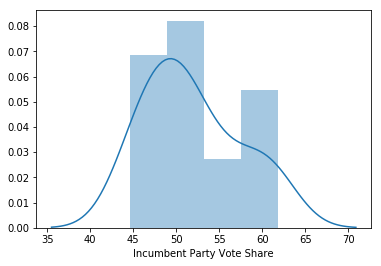

In [213]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['Incumbent Party Vote Share']);

In [214]:
target = 'Incumbent Party Vote Share'

# This would be more typical
mean_baseline = [df[target].mean()] * len(df)

# We'll do this here for demonstration purposes
df['Mean Baseline'] = df[target].mean()
df['Error'] = df['Mean Baseline'] - df[target]
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Unrate,Mean Baseline,Error
0,1952,Stevenson,Eisenhower,44.60,2.40,190,3.025000,51.828235,7.228235
1,1956,Eisenhower,Stevenson,57.76,2.89,0,4.125000,51.828235,-5.931765
2,1960,Nixon,Kennedy,49.91,0.85,0,5.541667,51.828235,1.918235
3,1964,Johnson,Goldwater,61.34,4.21,1,5.158333,51.828235,-9.511765
4,1968,Humphrey,Nixon,49.60,3.02,146,3.558333,51.828235,2.228235
5,1972,Nixon,McGovern,61.79,3.62,0,5.600000,51.828235,-9.961765
6,1976,Ford,Carter,48.95,1.08,2,7.700000,51.828235,2.878235
7,1980,Carter,Reagan,44.70,-0.39,0,7.175000,51.828235,7.128235
8,1984,Reagan,Mondale,59.17,3.86,0,7.508333,51.828235,-7.341765
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,5.491667,51.828235,-2.111765


In [215]:
# a wrong way
df['Error'].sum()

-1.4210854715202004e-14

In [216]:
# a right way
df['Absolute Error'] = df['Error'].abs()
df['Absolute Error'].sum()

75.88470588235293

In [217]:
75.88 / 17

4.463529411764705

In [218]:
df['Absolute Error'].mean()

4.463806228373703

In [219]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=df['Incumbent Party Vote Share'], 
                    y_pred=df['Mean Baseline'])

4.463806228373702

## Use scikit-learn for linear regression, with 1 feature




Follow the process from Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

### Choose a class of model by importing the appropriate estimator class from Scikit-Learn


In [0]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters by instantiating this class with desired values

Refer to scikit-learn documentation to see what model hyperparameters you can choose. For example: [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [0]:
model = LinearRegression()

### Arrange data into X features matrix and y target vector

In [222]:
X = df[['Average Recent Growth in Personal Incomes']]
y = df['Incumbent Party Vote Share']

type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [223]:
X.shape, y.shape

((17, 1), (17,))

In [0]:
features = ['Average Recent Growth in Personal Incomes']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]

### Fit the model to your data by calling the `fit()` method of the model instance

In [225]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method

In [0]:
y_pred = model.predict(X)

## Use regression metric: MAE

In [227]:
mean_absolute_error(y, y_pred)

2.5291938349608953

In [228]:
# We won't usually add predictions back to the original dataframe as a new column, 
# But we'll do this here just for demonstration purposes
df['Linear Regression, 1 feature'] = y_pred
df['Error'] = df['Linear Regression, 1 feature'] - df[target]
df['Absolute Error'] = df['Error'].abs()

df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Unrate,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature"
0,1952,Stevenson,Eisenhower,44.60,2.40,190,3.025000,51.828235,9.037235,9.037235,53.637235
1,1956,Eisenhower,Stevenson,57.76,2.89,0,4.125000,51.828235,-2.665418,2.665418,55.094582
2,1960,Nixon,Kennedy,49.91,0.85,0,5.541667,51.828235,-0.882740,0.882740,49.027260
3,1964,Johnson,Goldwater,61.34,4.21,1,5.158333,51.828235,-2.319505,2.319505,59.020495
4,1968,Humphrey,Nixon,49.60,3.02,146,3.558333,51.828235,5.881225,5.881225,55.481225
5,1972,Nixon,McGovern,61.79,3.62,0,5.600000,51.828235,-4.524269,4.524269,57.265731
6,1976,Ford,Carter,48.95,1.08,2,7.700000,51.828235,0.761321,0.761321,49.711321
7,1980,Carter,Reagan,44.70,-0.39,0,7.175000,51.828235,0.639281,0.639281,45.339281
8,1984,Reagan,Mondale,59.17,3.86,0,7.508333,51.828235,-1.190467,1.190467,57.979533
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,5.491667,51.828235,-0.689408,0.689408,53.250592


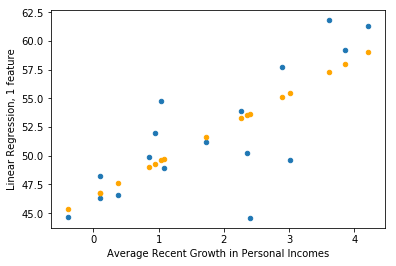

In [229]:
ax = df.plot(x='Average Recent Growth in Personal Incomes', 
             y='Incumbent Party Vote Share', 
             kind='scatter')

df.plot(x='Average Recent Growth in Personal Incomes', 
        y='Linear Regression, 1 feature', 
        kind='scatter', 
        color='orange', 
        ax=ax);

In [230]:
len(y_pred)

17

In [231]:
X.values

array([[ 2.4 ],
       [ 2.89],
       [ 0.85],
       [ 4.21],
       [ 3.02],
       [ 3.62],
       [ 1.08],
       [-0.39],
       [ 3.86],
       [ 2.27],
       [ 0.38],
       [ 1.04],
       [ 2.36],
       [ 1.72],
       [ 0.1 ],
       [ 0.95],
       [ 0.1 ]])

In [232]:
y_pred

array([53.63723477, 55.09458154, 49.02726028, 59.0204953 , 55.48122457,
       57.26573082, 49.71132101, 45.33928069, 57.97953332, 53.25059175,
       47.62939705, 49.59235393, 53.51826769, 51.61479435, 46.79662747,
       49.32467799, 46.79662747])

In [233]:
# What incumbent party vote share does the model predict for 2.4% personal income growth?
model.predict([[2.4]])

array([53.63723477])

In [234]:
# What incumbent party vote share does the model predict for 1% personal income growth?
model.predict([[1]])

array([49.47338685])

In [235]:
model.predict([[2]])

array([52.44756393])

In [236]:
model.predict([[3]])

array([55.42174102])

In [237]:
model.predict([[3]]) - model.predict([[2]])

array([2.97417709])

In [238]:
model.predict([[2]]) - model.predict([[1]])

array([2.97417709])

In [239]:
model.predict([[0]])

array([46.49920976])

In [240]:
model.coef_, model.intercept_

(array([2.97417709]), 46.499209757741625)

In [241]:
model.predict([[20]])

array([105.98275153])

In [242]:
model.predict([[-20]])

array([-12.98433201])

## Use scikit-learn for linear regression, with 2 features

Follow the process from Jake VanderPlas, [Python Data Science Handbook, Chapter 5.2, Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html), Scikit-Learn's Estimator API

### Choose a class of model by importing the appropriate estimator class from Scikit-Learn

In [0]:
from sklearn.linear_model import LinearRegression

### Choose model hyperparameters by instantiating this class with desired values

In [0]:
model = LinearRegression()

### Arrange data into X features matrix and y target vector

In [0]:
features = ['Average Recent Growth in Personal Incomes', 
            'Unrate']

target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

### Fit the model to your data by calling the `fit()` method of the model instance

In [246]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method

In [0]:
y_pred = model.predict(X)

## Use regression metric: MAE

In [248]:
mean_absolute_error(y, y_pred)

2.445254761830504

In [173]:
df['Linear Regression, 2 features'] = y_pred
df['Error'] = y_pred - df[target]
df['Absolute Error'] = df['Error'].abs()
df

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,UNRATE,Mean Baseline,Error,Absolute Error,"Linear Regression, 1 feature","Linear Regression, 2 features"
0,1952,Stevenson,Eisenhower,44.60,2.40,190,3.025000,51.828235,0.247507,0.247507,53.637235,44.847507
1,1956,Eisenhower,Stevenson,57.76,2.89,0,4.125000,51.828235,-1.030524,1.030524,55.094582,56.729476
2,1960,Nixon,Kennedy,49.91,0.85,0,5.541667,51.828235,-0.129201,0.129201,49.027260,49.780799
3,1964,Johnson,Goldwater,61.34,4.21,1,5.158333,51.828235,-0.168074,0.168074,59.020495,61.171926
4,1968,Humphrey,Nixon,49.60,3.02,146,3.558333,51.828235,-0.275542,0.275542,55.481225,49.324458
5,1972,Nixon,McGovern,61.79,3.62,0,5.600000,51.828235,-2.573988,2.573988,57.265731,59.216012
6,1976,Ford,Carter,48.95,1.08,2,7.700000,51.828235,1.506724,1.506724,49.711321,50.456724
7,1980,Carter,Reagan,44.70,-0.39,0,7.175000,51.828235,0.857093,0.857093,45.339281,45.557093
8,1984,Reagan,Mondale,59.17,3.86,0,7.508333,51.828235,0.863503,0.863503,57.979533,60.033503
9,1988,"Bush, Sr.",Dukakis,53.94,2.27,0,5.491667,51.828235,0.677623,0.677623,53.250592,54.617623


## Do test-train split

[Nate Silver's post on economic elections models](https://fivethirtyeight.com/features/what-do-economic-models-really-tell-us-about-elections/) discusses out-of-sample testing.


In [174]:
train = df.query('Year < 2008')
test  = df.query('Year >= 2008')
X_train = train[features] 
y_train = train[target]
X_test  = test[features]
y_test  = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14, 2), (14,), (3, 2), (3,))

In [175]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
y_pred = model.predict(X_test)

y_pred

array([45.86970509, 49.39965918, 46.34811893])

In [177]:
y_test

14    46.32
15    52.00
16    48.20
Name: Incumbent Party Vote Share, dtype: float64

In [0]:
mean_absolute_error(y_test, y_pred)

## Do leave-one-out cross-validation


[Sebastian Raschka's chart](https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg) shows that "leave-one-out cross-validation" is an option for small datasets.

In [0]:
# Choose a class of model by importing the appropriate estimator class
from sklearn.linear_model import LinearRegression

print('Leave-One-Out Cross-Validation, Do-It-Yourself implementation:')

maes = []

for year in df['Year']:
    print(f'Fit Linear Regression on all years except {year}')
    
    # Choose model hyperparamaters by instantiating this class
    model = LinearRegression()
    
    # Arrange data into X features matrix and y target vector
    train = df[df['Year'] != year]
    test = df[df['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    # Fit the model to your data by calling the fit() method of the estimator
    model.fit(X_train, y_train)
    
    # Apply the model to new data: predict labels for unknown data using predict() method
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)
    print(f'Absolute Error on prediction for {year} = {mae}')
    

In [0]:
# Leave-One-Out Cross-Validation Mean Absolute Error
pd.Series(maes).mean()